<a href="https://colab.research.google.com/github/saurabhshinkar/CRP/blob/main/Cardiovascular_Risk_prediction_Saurabh_Shinkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardiovascular Risk Prediction**

### <b> Problem Description </b>
### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

## <b> Data Description </b>

### <b> The dataset provides the patients’ information. It includesover 4,000 records and 15 attributes.Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>

### <b>Demographic: </b>


• **Sex**: male or female("M" or "F")

•** Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### <b>Medical( history): </b>


• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)

### <b>Medical(current): </b>


• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)

### <b>Predict variable (desired target) </b>


• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Importing** **Libraries**

In [414]:
#Import all library that will be used in entire project

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score,f1_score,roc_curve, roc_auc_score,classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 



# **Mount Drive And Import Data**

In [ ]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/Cardiovascular Risk prediction/'
data= pd.read_csv(File_path + 'data_cardiovascular_risk.csv')

In [ ]:
# First Look 
data.head()

In [399]:
#tail of data
data.tail()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD,sex_F,sex_M
3384,61,1.0,0.0,0.0,0,1,0,217.0,182.0,26.98,113.0,0,1,0
3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,29.28,103.0,0,1,0
3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,21.96,84.0,0,1,0
3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,28.92,72.0,1,0,1
3389,54,3.0,0.0,0.0,0,0,0,288.0,124.0,29.88,92.0,0,1,0


In [400]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3272 non-null   int64  
 1   education        3272 non-null   float64
 2   cigsPerDay       3272 non-null   float64
 3   BPMeds           3272 non-null   float64
 4   prevalentStroke  3272 non-null   int64  
 5   prevalentHyp     3272 non-null   int64  
 6   diabetes         3272 non-null   int64  
 7   totChol          3272 non-null   float64
 8   sysBP            3272 non-null   float64
 9   BMI              3272 non-null   float64
 10  glucose          3272 non-null   float64
 11  TenYearCHD       3272 non-null   int64  
 12  sex_F            3272 non-null   uint8  
 13  sex_M            3272 non-null   uint8  
dtypes: float64(7), int64(5), uint8(2)
memory usage: 338.7 KB


In [401]:
#Discription of Data
data.describe(include='all')

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD,sex_F,sex_M
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000
mean,49.442237,1.973411,9.054095,0.029645,0.005807,0.313264,0.025672,237.036675,132.409077,25.800339,81.665954,0.149144,0.561430,0.438570
std,8.559199,1.005440,11.866441,0.169633,0.075993,0.463892,0.158180,45.114324,22.123491,4.123262,23.142282,0.356285,0.496288,0.496288
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,15.960000,40.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,23.010000,72.000000,0.000000,0.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,25.390000,78.000000,0.000000,1.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.625000,28.040000,85.000000,0.000000,1.000000,1.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,56.800000,394.000000,1.000000,1.000000,1.000000


# **Handling Missing Vaules**

In [402]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [403]:
#data of null glucose values
data[data['glucose'].isnull()].head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD,sex_F,sex_M


Text(0.5, 1.0, 'Distribution Plot Of glucose')

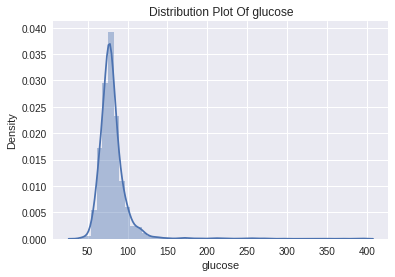

In [404]:
#Distribution Plot Of glucose
sns.distplot(data.glucose.dropna())
plt.title('Distribution Plot Of glucose')

In [405]:
#median of glucose
data.glucose.median()

78.0

In [406]:
#Fill NaN Values in glucose Column with Median
data['glucose'] =data['glucose'].fillna(data['glucose'].median())

Text(0.5, 1.0, 'Distribution Plot Of education')

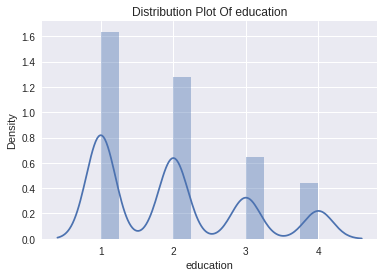

In [407]:
#Distribution Plot Of education
sns.distplot(data.education.dropna())
plt.title('Distribution Plot Of education')

In [408]:
#Fill NaN Values in glucose Column with Median
data['education'] =data['education'].fillna(data['education'].median())

In [409]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [410]:
#Dropping null as they are now negligible 
data.dropna(inplace=True)

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3272 non-null   int64  
 1   education        3272 non-null   float64
 2   cigsPerDay       3272 non-null   float64
 3   BPMeds           3272 non-null   float64
 4   prevalentStroke  3272 non-null   int64  
 5   prevalentHyp     3272 non-null   int64  
 6   diabetes         3272 non-null   int64  
 7   totChol          3272 non-null   float64
 8   sysBP            3272 non-null   float64
 9   BMI              3272 non-null   float64
 10  glucose          3272 non-null   float64
 11  TenYearCHD       3272 non-null   int64  
 12  sex_F            3272 non-null   uint8  
 13  sex_M            3272 non-null   uint8  
dtypes: float64(7), int64(5), uint8(2)
memory usage: 338.7 KB


In [412]:
#Numerical features
numerical=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

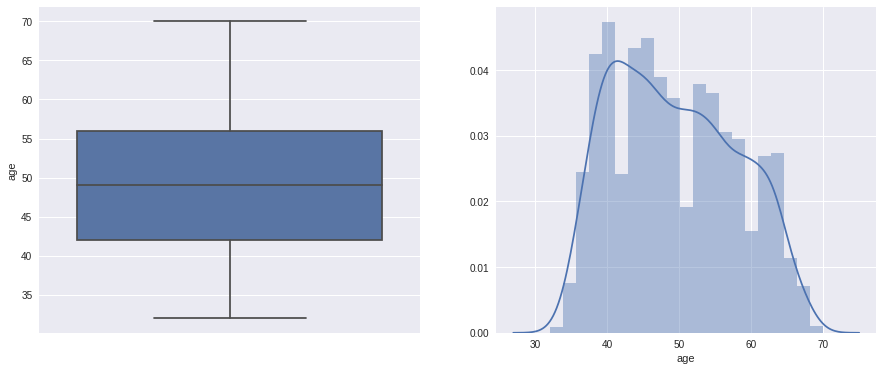

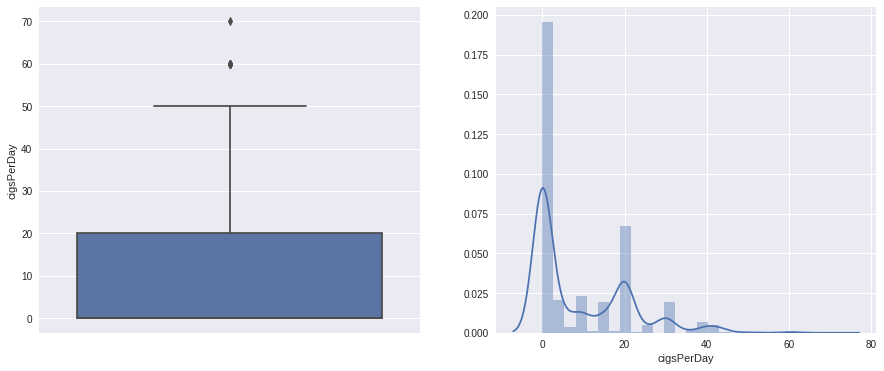

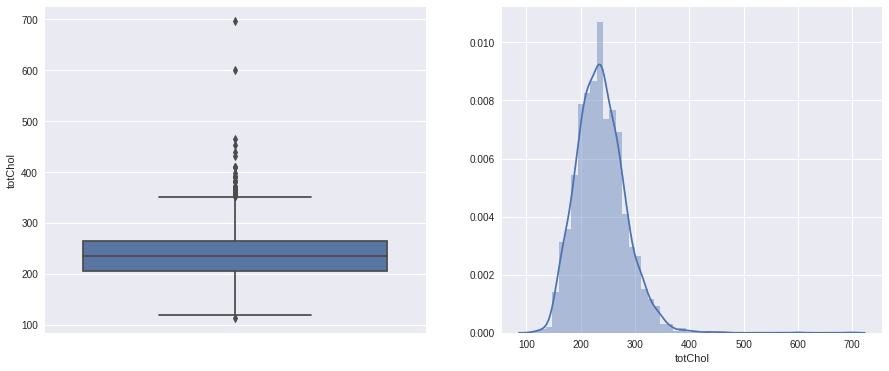

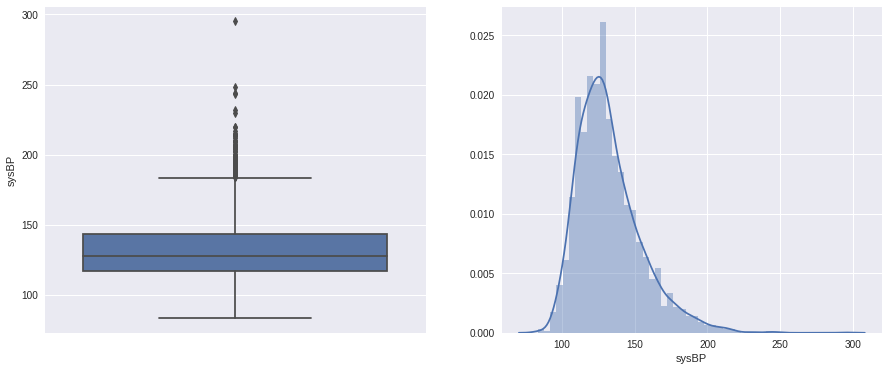

KeyError: ignored

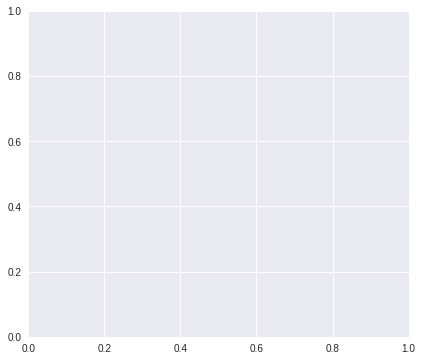

In [413]:
#Boxplot and distribution plot of numerical features
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

**We can see outliers are present in our data but We are not them as we have less data**

smote remained to used and also converting features into categorical and combining related feature is remained

# **EDA**

## **Univariate Analysis**

***Barplot Of Age Distribution***

In [ ]:
#barplot of age and its counts 
plt.figure(figsize=(20,7))
sns.countplot(x = data['age'])
plt.title('Age Wise Distribution',fontsize=15)
plt.grid()
plt.show()

***Barplot Of Education Distribution***

In [ ]:
#barplot of education and its counts 
plt.figure(figsize=(12,7))
sns.countplot(x = data['education'])
plt.title('Education Wise Distribution',fontsize=15)
plt.grid()
plt.show()

***Pieplot of Male And Female %***

In [ ]:
#Percentage Count Of Male And female
plt.figure(figsize=(10,7))
plt.pie(data['sex'].value_counts(),labels=['M','F'],autopct='%.0f%%',explode=[0.03,0])
plt.title('Percentage Of Male And Female')
plt.show()

***Barh Plot Of is_smoking Value Counts***

In [ ]:
#Categories of Top 50 Install Apps
data['is_smoking'].value_counts().plot(kind="barh")
plt.title("is_smoking counts",fontsize=20)
plt.ylabel("is_smoking")
plt.xlabel("Count")
plt.grid()

***Distribution plot of numerical features***

In [ ]:
#Distribution plot of numerical features
for var in numerical:
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna(),color="brown",fit=norm)
    plt.grid()
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

## **Bivariate Analysis**

***Count Plot Of Age And Ten Year CHD***

In [ ]:
#Value Counts Of Two Variable Age And Ten Year CHD
plt.rcParams['figure.figsize'] = (40,10)
plt.subplot(1, 2, 2)
fig = sns.countplot(x=data['age'],hue=data['TenYearCHD'],palette="Set2")
#plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
fig.set_ylabel('count')
fig.set_xlabel('age')
plt.title("Value Counts Of Two Variable Age And Ten Year CHD",fontsize=20)

plt.show()

From above plot we can see that as the age increases ***proportion*** of people having CHD is increases

***Count Plot Of Sex And Ten Year CHD***

In [ ]:
#Value Counts Of Two Variable Sex And Ten Year CHD
plt.rcParams['figure.figsize'] = (20,7)
plt.subplot(1, 2, 2)
fig = sns.countplot(y=data['sex'],hue=data['TenYearCHD'],palette="Set3")
#plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
fig.set_xlabel('count')
fig.set_ylabel('Sex')
plt.title("Value Counts Of Two Variable Sex And Ten Year CHD",fontsize=20)

plt.show()

**We can see that proportion of male having CHD is more than female** 

***Count Plot Of is_smoking And Ten Year CHD***

In [ ]:
#Value Counts Of Two Variable is_smoking And Ten Year CHD
plt.rcParams['figure.figsize'] = (20,7)
plt.subplot(1, 2, 2)
fig = sns.countplot(x=data['is_smoking'],hue=data['TenYearCHD'],palette="Set1")
#plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
fig.set_ylabel('count')
fig.set_xlabel('is_smoking')
plt.title("Value Counts Of Two Variable is_smoking And Ten Year CHD",fontsize=20)

plt.show()

**Proportion of smokers having CHD is slighlty more than non smokers**

***Count Plot Of prevalentHyp And Ten Year CHD***

In [ ]:
#Value Counts Of Two Variable prevalentHyp And Ten Year CHD
plt.rcParams['figure.figsize'] = (20,7)
plt.subplot(1, 2, 2)
fig = sns.countplot(y=data['prevalentHyp'],hue=data['TenYearCHD'],facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
#plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
fig.set_xlabel('count')
fig.set_ylabel('prevalentHyp')
plt.title("Value Counts Of Two Variable prevalentHyp And Ten Year CHD",fontsize=20)

plt.show()

**proportion of prevalentHyp people having CHD is larger than non prevalentHyp people** 

##**Finding correlation in variables (both dependent and independent)**

In [ ]:
#Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

**There is 78% positive correlation in sysBP and diaBP** 

**The top number is the maximum pressure the heart exerts while beating (systolic pressure). The bottom number is the amount of pressure in the arteries between beats (diastolic pressure).**

**so we will drop column diaBP as diaBP is less correlated with TenYearCHD compared to sysBP**

In [ ]:
#drop column diaBP
data.drop(columns=['diaBP'],axis=1,inplace=True)

**heartrate is having very less correlation with TenYearCHD so we will drop it**

In [ ]:
#drop column heartRate
data.drop(columns=['heartRate'],axis=1,inplace=True)

In [ ]:
#drop column id as it is of no use
data.drop(columns=['id'],axis=1,inplace=True)

*cigsPerday have detailed information about smokers and non smokers so we can drop is_smoking column*

In [ ]:
#drop column is_smoking
data.drop(columns=['is_smoking'],axis=1,inplace=True)

*Converting categorical variable Sex in to dummy variable*

In [ ]:
#dummy variable from sex column
data= pd.get_dummies(data, columns=['sex'])

In [ ]:
#dependant variable
Y=data['TenYearCHD']

#independant variable
df=data.copy()
df.drop(columns=['TenYearCHD'],axis=1,inplace=True)
X=df

In [ ]:
# visualize the target variable
g = sns.countplot(data['TenYearCHD'])
g.set_xticklabels(['yes','no'])
plt.show()

**As data is imbalance we will use Synthetic Minority Oversampling Technique, or SMOTE for short.**

## **SMOTE**

In [ ]:
# fit predictor and target variable
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

In [ ]:
# visualize the target variable
g = sns.countplot(y_smote)
g.set_xticklabels(['yes','no'])
plt.show()

## **Feature** **Standardization**

In [ ]:
#StandardScaler- Standardize features by removing the mean and scaling to unit variance.
# Transforming data
scaler = StandardScaler()
x_smote = scaler.fit_transform(x_smote)

## **Train Test Split**

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.30, random_state = 10)

# **Logistic**

In [ ]:
# Instantiation
logistic= LogisticRegression(fit_intercept=True, max_iter=10000)
# Fitting the model
logistic.fit(X_train, y_train)

In [ ]:
# Predicting the results
y_pred_train =logistic.predict(X_train)
y_pred_test =logistic.predict(X_test)
y_pred_l=logistic.predict(X_test)

In [ ]:
#Evaluation 
Accuracy_train_l= accuracy_score(y_train,y_pred_train)
Accuracy_test_l= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_l= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_l= roc_auc_score(y_test,y_pred_test)
precision_l= precision_score(y_test, y_pred_test, average='weighted')
recall_l=recall_score(y_test, y_pred_test, average='weighted')
f1_score_l=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)



In [ ]:
#Classification report
print(classification_report(y_test, y_pred_test))

## **Logistic with hyperparameter tuning**

In [ ]:
#reference- geeksforgeeks
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logistic_h=logreg_cv.fit(X_train, y_train)

In [ ]:
# Predicting the results
y_pred_train =logistic_h.predict(X_train)
y_pred_test =logistic_h.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_lh= accuracy_score(y_train,y_pred_train)
Accuracy_test_lh= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_lh= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_lh= roc_auc_score(y_test,y_pred_test)
precision_lh= precision_score(y_test, y_pred_test, average='weighted')
recall_lh=recall_score(y_test, y_pred_test, average='weighted')
f1_score_lh=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification report
print(classification_report(y_test, y_pred_test))

#  **Decision Tree**

In [ ]:
# Instantiation
Tree= DecisionTreeClassifier()
# Fitting the model
Tree.fit(X_train, y_train)

In [ ]:
# Predicting the results
y_pred_train =Tree.predict(X_train)
y_pred_test =Tree.predict(X_test)
y_pred_t =Tree.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_t= accuracy_score(y_train,y_pred_train)
Accuracy_test_t= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_t= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_t= roc_auc_score(y_test,y_pred_test)
precision_t= precision_score(y_test, y_pred_test, average='weighted')
recall_t=recall_score(y_test, y_pred_test, average='weighted')
f1_score_t=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_test))

In [ ]:
pd.DataFrame(X_train,columns=['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'glucose','sex_F', 'sex_M'] )

In [ ]:
#storing features and there importance
features = X.columns
importances = Tree.feature_importances_
indices = np.argsort(importances)

In [ ]:
#barh plot of features and there importance
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

##**Decision Tree with hyperparameter tuning**

In [ ]:
#fiting Decision Tree with hyperparameter tuning
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
Tree_h = GridSearchCV(Tree, tree_para, cv=5)
Tree_h.fit(X_train, y_train)

In [ ]:
# Predicting the results
y_pred_train =Tree_h.predict(X_train)
y_pred_test =Tree_h.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_th= accuracy_score(y_train,y_pred_train)
Accuracy_test_th= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_th= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_th= roc_auc_score(y_test,y_pred_test)
precision_th= precision_score(y_test, y_pred_test, average='weighted')
recall_th=recall_score(y_test, y_pred_test, average='weighted')
f1_score_th=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_test))

# **Random Forest**

In [ ]:
# Instantiation
forest= RandomForestClassifier(n_estimators=200,max_depth=20)
# Fitting the model
forest.fit(X_train, y_train)

In [ ]:
# Predicting the results
y_pred_train =forest.predict(X_train)
y_pred_test =forest.predict(X_test)
y_pred_f =forest.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_r= accuracy_score(y_train,y_pred_train)
Accuracy_test_r= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_r= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_r= roc_auc_score(y_test,y_pred_test)
precision_r= precision_score(y_test, y_pred_test, average='weighted')
recall_r=recall_score(y_test, y_pred_test, average='weighted')
f1_score_r=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_test))

## **Random Forest with hyperparameter tuning**

In [ ]:
#Random Forest with hyperparameter tuning
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['sqrt']
}

forest_h = GridSearchCV(forest, param_grid=param_grid, cv= 5)
# Fitting the model
forest_h.fit(X_train, y_train)


In [ ]:
# Predicting the results
y_pred_train =forest_h.predict(X_train)
y_pred_test =forest_h.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_rh= accuracy_score(y_train,y_pred_train)
Accuracy_test_rh= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_rh= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_rh= roc_auc_score(y_test,y_pred_test)
precision_rh= precision_score(y_test, y_pred_test, average='weighted')
recall_rh=recall_score(y_test, y_pred_test, average='weighted')
f1_score_rh=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_test))

# **XG Boost**

In [ ]:

# Instantiation
xgb = xg.XGBClassifier()

 
# Fitting the model
xgb.fit(X_train, y_train)


In [ ]:
# Predicting the results
y_pred_train =xgb.predict(X_train)
y_pred_test =xgb.predict(X_test)
y_pred_x =xgb.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_x= accuracy_score(y_train,y_pred_train)
Accuracy_test_x= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_x= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_x= roc_auc_score(y_test,y_pred_test)
precision_x= precision_score(y_test, y_pred_test, average='weighted')
recall_x=recall_score(y_test, y_pred_test, average='weighted')
f1_score_x=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_test))

## **XGBoost with hyperparameter tuning**

In [ ]:
#Grid Search CV
grid_values = {'n_estimators':[50, 80,  100, 150], 'max_depth':[3, 5, 7,10]}
xgb_h = GridSearchCV(xgb, param_grid = grid_values, cv=5)
# Fitting the model
xgb_h.fit(X_train, y_train)

In [ ]:
# Predicting the results
y_pred_train =xgb_h.predict(X_train)
y_pred_test =xgb_h.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_xh= accuracy_score(y_train,y_pred_train)
Accuracy_test_xh= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_xh= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_xh= roc_auc_score(y_test,y_pred_test)
precision_xh= precision_score(y_test, y_pred_test, average='weighted')
recall_xh=recall_score(y_test, y_pred_test, average='weighted')
f1_score_xh=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_test))

# **KNN**

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

In [ ]:
# Predicting the results
y_pred_train =knn.predict(X_train)
y_pred_test =knn.predict(X_test)
y_pred_k =knn.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_k= accuracy_score(y_train,y_pred_train)
Accuracy_test_k= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_k= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_k= roc_auc_score(y_test,y_pred_test)
precision_k= precision_score(y_test, y_pred_test, average='weighted')
recall_k=recall_score(y_test, y_pred_test, average='weighted')
f1_score_k=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_test))

##**knn with hyperparameter tuning**

In [ ]:
#parameters
k_range = list(range(1, 7))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
knn_h= GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
knn_h.fit(X_train,y_train)

In [ ]:
# Predicting the results
y_pred_train =knn.predict(X_train)
y_pred_test =knn.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_kh= accuracy_score(y_train,y_pred_train)
Accuracy_test_kh= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_kh= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_kh= roc_auc_score(y_test,y_pred_test)
precision_kh= precision_score(y_test, y_pred_test, average='weighted')
recall_kh=recall_score(y_test, y_pred_test, average='weighted')
f1_score_kh=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_test))

# **Naive Bayes Classifier**

In [ ]:
# Fit the model
naive_bayes= GaussianNB()
naive_bayes.fit(X_train,y_train)

In [ ]:
# Predicting the results
y_pred_train =naive_bayes.predict(X_train)
y_pred_test =naive_bayes.predict(X_test)
y_pred_n =naive_bayes.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_n= accuracy_score(y_train,y_pred_train)
Accuracy_test_n= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_n= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_n= roc_auc_score(y_test,y_pred_test)
precision_n= precision_score(y_test, y_pred_test, average='weighted')
recall_n=recall_score(y_test, y_pred_test, average='weighted')
f1_score_n=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_train,y_pred_train))

## **Naive bayes with hyperparameter tuning**

In [ ]:
#Grid search cv
param_grid = {"gamma": [0.1, 1.0, 10, 100, 1000]}
naive_bayes_h= GridSearchCV(naive_bayes, param_grid, verbose=2)


In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_bayes_h = GridSearchCV(naive_bayes, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
naive_bayes_h.fit(X_train, y_train)

In [ ]:
# Predicting the results
y_pred_train =naive_bayes_h.predict(X_train)
y_pred_test =naive_bayes_h.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_nh= accuracy_score(y_train,y_pred_train)
Accuracy_test_nh= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_nh= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_nh= roc_auc_score(y_test,y_pred_test)
precision_nh= precision_score(y_test, y_pred_test, average='weighted')
recall_nh=recall_score(y_test, y_pred_test, average='weighted')
f1_score_nh=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_train,y_pred_train))

# **SVM(Support Vector Machine Classifier)**





In [ ]:
#Support vector classifier
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
# Predicting the results
y_pred_train =model.predict(X_train)
y_pred_test =model.predict(X_test)
y_pred_s =model.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_s= accuracy_score(y_train,y_pred_train)
Accuracy_test_s= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_s= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_s= roc_auc_score(y_test,y_pred_test)
precision_s= precision_score(y_test, y_pred_test, average='weighted')
recall_s=recall_score(y_test, y_pred_test, average='weighted')
f1_score_s=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_train,y_pred_train))

## **SVM with with hyperparameter tuning**

In [ ]:
# defining parameter range
param_grid = {'C': [10], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
svm_h = GridSearchCV(model, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
svm_h.fit(X_train, y_train)

In [ ]:
# Predicting the results
y_pred_train =svm_h.predict(X_train)
y_pred_test =svm_h.predict(X_test)

In [ ]:
#Evaluation
Accuracy_train_sh= accuracy_score(y_train,y_pred_train)
Accuracy_test_sh= accuracy_score(y_test,y_pred_test)
roc_auc_score_train_sh= roc_auc_score(y_train,y_pred_train)
roc_auc_score_test_sh= roc_auc_score(y_test,y_pred_test)
precision_sh= precision_score(y_test, y_pred_test, average='weighted')
recall_sh=recall_score(y_test, y_pred_test, average='weighted')
f1_score_sh=f1_score(y_test,y_pred_test, average='weighted')

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=20)

In [ ]:
#Classification Report
print(classification_report(y_train,y_pred_train))

# **All Model's Evaluation**

In [ ]:
#Models without Hyperparameter Tuning
#models and there results in dictionary  
model_dict= {'Logistic':[Accuracy_train_l,Accuracy_test_l, roc_auc_score_train_l,roc_auc_score_test_l,precision_l,recall_l,f1_score_l],
             'Decision Tree':[Accuracy_train_t,Accuracy_test_t, roc_auc_score_train_t,roc_auc_score_test_t,precision_t,recall_t,f1_score_t],
             'Random Forest':[Accuracy_train_r,Accuracy_test_r, roc_auc_score_train_r,roc_auc_score_test_r,precision_r,recall_r,f1_score_r],
             'XG Boost':[Accuracy_train_x,Accuracy_test_x, roc_auc_score_train_x,roc_auc_score_test_x,precision_x,recall_x,f1_score_x],
             'KNN':[Accuracy_train_k,Accuracy_test_k, roc_auc_score_train_k,roc_auc_score_test_k,precision_k,recall_k,f1_score_k],
             'Naive Bayes':[Accuracy_train_n,Accuracy_test_n, roc_auc_score_train_n,roc_auc_score_test_n,precision_n,recall_n,f1_score_n],
             'SVM':[Accuracy_train_s,Accuracy_test_s, roc_auc_score_train_s,roc_auc_score_test_s,precision_s,recall_s,f1_score_s]}

In [ ]:
#converting dictionary into Dataframe
result=pd.DataFrame(model_dict,index =['Accuracy Train','Accuracy Test','ROC AUC Train','ROC AUC Test','Precision','Recall','F1 Score']) 

**Evaluation of all models without Hyperparameter Tuning**

In [ ]:
#Evaluation table
result

**Train and Test Accuracy Of All Models Without HyperParameter Tuning**

In [ ]:
#plot of accuracy
d1=result[:-5]
d1.transpose(copy=True).plot()
plt.title("Train and Test Accuracy",fontsize="20")
plt.gcf().set_size_inches(15, 5)

**Different types of Evaluations of models without hyperparameter tuning**

In [ ]:
#All Evaluations of models without hyperparameter tuning
resultt=result.transpose(copy=True)
resultt.plot()
plt.title("Evaluation",fontsize="20")
plt.gcf().set_size_inches(15, 5)

In [ ]:
#Models with Hyperparameter Tuning
#models and there results in dictionary  
model_dict1= {'Logistic with Hyperparameter Tuning':[Accuracy_train_lh,Accuracy_test_lh, roc_auc_score_train_lh,roc_auc_score_test_lh,precision_lh,recall_lh,f1_score_lh],
             'Decision Tree with Hyperparameter Tuning':[Accuracy_train_th,Accuracy_test_th, roc_auc_score_train_th,roc_auc_score_test_th,precision_th,recall_th,f1_score_th],
             'Random Forest with Hyperparameter Tuning':[Accuracy_train_rh,Accuracy_test_rh, roc_auc_score_train_rh,roc_auc_score_test_rh,precision_rh,recall_rh,f1_score_rh],
             'XG Boost with Hyperparameter Tuning':[Accuracy_train_xh,Accuracy_test_xh, roc_auc_score_train_xh,roc_auc_score_test_xh,precision_xh,recall_xh,f1_score_xh],
             'KNN with Hyperparameter Tuning':[Accuracy_train_kh,Accuracy_test_kh, roc_auc_score_train_kh,roc_auc_score_test_kh,precision_kh,recall_kh,f1_score_kh],
             'Naive Bayes with Hyperparameter Tuning':[Accuracy_train_nh,Accuracy_test_nh, roc_auc_score_train_nh,roc_auc_score_test_nh,precision_nh,recall_nh,f1_score_nh],
             'SVM with Hyperparameter Tuning':[Accuracy_train_sh,Accuracy_test_sh, roc_auc_score_train_sh,roc_auc_score_test_sh,precision_sh,recall_sh,f1_score_sh]}

In [ ]:
#converting dictionary into Dataframe
result1=pd.DataFrame(model_dict1,index =['Accuracy Train','Accuracy Test','ROC AUC Train','ROC AUC Test','Precision','Recall','F1 Score'])

**Evaluation of all models with Hyperparameter Tuning**

In [ ]:
#Evaluation table
result1

**Train and Test Accuracy Of All Models Without HyperParameter Tuning**

In [ ]:
#plot of accuracy
d1=result1[:-5]
d1.transpose(copy=True).plot()
plt.title("Train and Test Accuracy",fontsize="20")
plt.xticks(rotation=20, horizontalalignment="center")
plt.gcf().set_size_inches(15, 5)

**Different types of Evaluations of models without hyperparameter tuning**

In [ ]:
#All Evaluations of models without hyperparameter tuning
resultt=result1.transpose(copy=True)
resultt.plot()
plt.title("Evaluation",fontsize="20")
plt.xticks(rotation=20, horizontalalignment="center")
plt.gcf().set_size_inches(15, 5)